<a href="https://colab.research.google.com/github/raphmelgom/Deep_Learning-CNN-MNIST/blob/main/Deep_Learning_CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Neste código, primeiro carregamos o conjunto de dados MNIST usando a função load_data() do Keras. Em seguida, normalizamos os dados de entrada dividindo cada pixel por 255.0, para que eles fiquem na faixa entre 0 e 1.

Em seguida, definimos a arquitetura do modelo. Começamos com uma camada de entrada para receber as imagens em escala de cinza de 28x28 pixels. Em seguida, remodelamos as imagens para terem a forma (28, 28, 1) e aplicamos uma camada de convolução com 32 filtros e tamanho de kernel 3x3, seguida por uma camada de pooling máxima 2x2 para reduzir a dimensionalidade das características. Em seguida, achatamos as características em um vetor e passamos por duas camadas densas (fully-connected), com funções de ativação ReLU, antes de sair na camada de saída com uma função de ativação Softmax para obter as previsões de classe.

Em seguida, compilamos o modelo com o otimizador "adam" e a função de perda "sparse_categorical_crossentropy", que é adequada para problemas de classificação com várias classes. Também definimos a métrica de avaliação para a precisão (accuracy).

Em seguida, treinamos o modelo por 10 épocas, com uma divisão de validação de 20% para monitorar a precisão e a perda em um conjunto de dados separado. Finalmente, avaliamos o modelo no conjunto de testes e imprimimos a perda e a precisão obtidas. Este modelo deve alcançar uma precisão de teste superior a 98%.

#1.Importando

In [ ]:
# Importando as bibliotecas
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

#2.Carregando e Normalizando Dados

In [ ]:
# Load do MNIST dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

##2.1 Visualizando as Classes

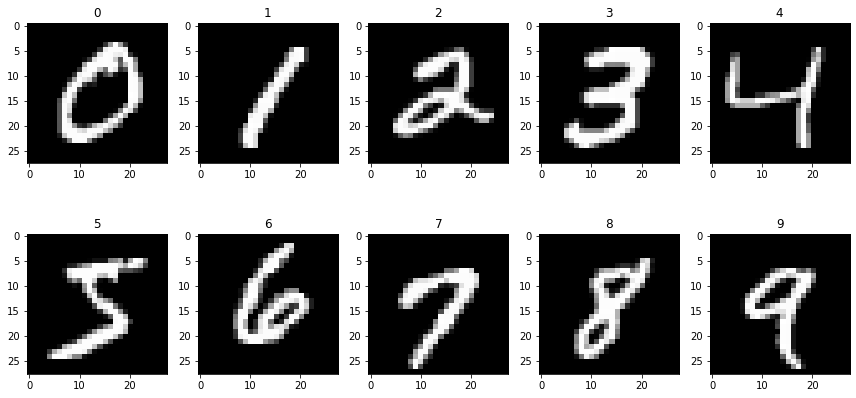

In [ ]:
# Obtém as classes únicas do conjunto de treinamento
classes = np.unique(y_train)

# Cria uma matriz de subplot do matplotlib
fig, ax = plt.subplots(2, 5, figsize=(12, 6))

# Itera pelas classes e exibe uma imagem para cada uma
for i, cls in enumerate(classes):
    # Encontra a primeira imagem no conjunto de treinamento com a classe atual
    idx = np.where(y_train == cls)[0][0]
    # Obtém a imagem correspondente
    img = X_train[idx]
    # Exibe a imagem no subplot correspondente
    row = i // 5
    col = i % 5
    ax[row, col].imshow(img, cmap='gray')
    ax[row, col].set_title(str(cls))
    
# Ajusta o layout do subplot e exibe a figura
plt.tight_layout()
plt.show()

##2.2 Normalizando

In [ ]:
# Normalizando
X_train = X_train / 255.0
X_test = X_test / 255.0

#3.Arquitetura Modelo Deep Learning->Rede Neural Convolucional (CNN)

Esse modelo é uma rede neural convolucional (CNN) com duas camadas convolucionais, seguidas por uma camada de pooling e uma camada densa para classificação. A arquitetura do modelo segue a seguinte ordem:

*   A camada de entrada recebe uma imagem de dimensões (28, 28), que é a dimensão de cada imagem do conjunto MNIST.
*   A camada Reshape transforma a imagem em um tensor tridimensional com dimensão (28, 28, 1), onde o último eixo representa o número de canais.
*   A primeira camada convolucional tem 32 filtros e tamanho de kernel (3,3), e usa a função de ativação ReLU.

*   A camada de pooling reduz a resolução espacial da saída da camada convolucional por um fator de 2, usando uma janela de pooling (2,2).

*   A segunda camada convolucional tem 64 filtros e tamanho de kernel (3,3), e usa a função de ativação ReLU.

*   A camada de pooling reduz a resolução espacial da saída da segunda camada convolucional por um fator de 2, usando uma janela de pooling (2,2).

*   A camada Flatten transforma o tensor tridimensional em um vetor unidimensional.

*   A camada densa tem 128 neurônios e usa a função de ativação ReLU.

*   A camada de saída tem 10 neurônios, correspondendo aos 10 dígitos que podem ser classificados, e usa a função de ativação softmax para calcular a probabilidade de cada classe.

In [ ]:
# Definindo a arquitetura do modelo
model = keras.Sequential(
    [
        layers.InputLayer(input_shape=(28, 28)),
        layers.Reshape(target_shape=(28, 28, 1)),
        layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(units=128, activation="relu"),
        layers.Dense(units=10, activation="softmax"),
    ]
)

model.summary() #imprime informações sobre o modelo

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_4 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 5408)              0         
                                                                 
 dense_8 (Dense)             (None, 128)               692352    
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                      

In [ ]:
# Compilando o modelo
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
# Treinando o modelo (80/20-teste/validação)
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1706 - accuracy: 0.9485 - val_loss: 0.0764 - val_accuracy: 0.9782
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0573 - accuracy: 0.9825 - val_loss: 0.0582 - val_accuracy: 0.9828
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0380 - accuracy: 0.9888 - val_loss: 0.0593 - val_accuracy: 0.9834
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0250 - accuracy: 0.9923 - val_loss: 0.0572 - val_accuracy: 0.9850
Epoch 5/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0174 - accuracy: 0.9944 - val_loss: 0.0602 - val_accuracy: 0.9845
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0119 - accuracy: 0.9962 - val_loss: 0.0646 - val_accuracy: 0.9850
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0091 - accuracy: 0.9969 - val_loss: 0.0674 - val_accuracy:

#4.Avaliação do Modelo

In [ ]:
# Avaliação do modelo
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0537 - accuracy: 0.9877
Test loss: 0.05366358533501625
Test accuracy: 0.9876999855041504


##4.1 Matriz de Confusão

A matriz de confusão é uma tabela que mostra a frequência de classificação para cada classe do modelo de classificação. É uma matriz quadrada onde as linhas representam as classes verdadeiras e as colunas representam as classes previstas pelo modelo.

Na diagonal principal, a matriz de confusão mostra o número de acertos para cada classe, enquanto as outras células mostram os erros de classificação. Portanto, é uma ferramenta importante para avaliar o desempenho de um modelo de classificação.

313/313 [==============================] - 1s 2ms/step


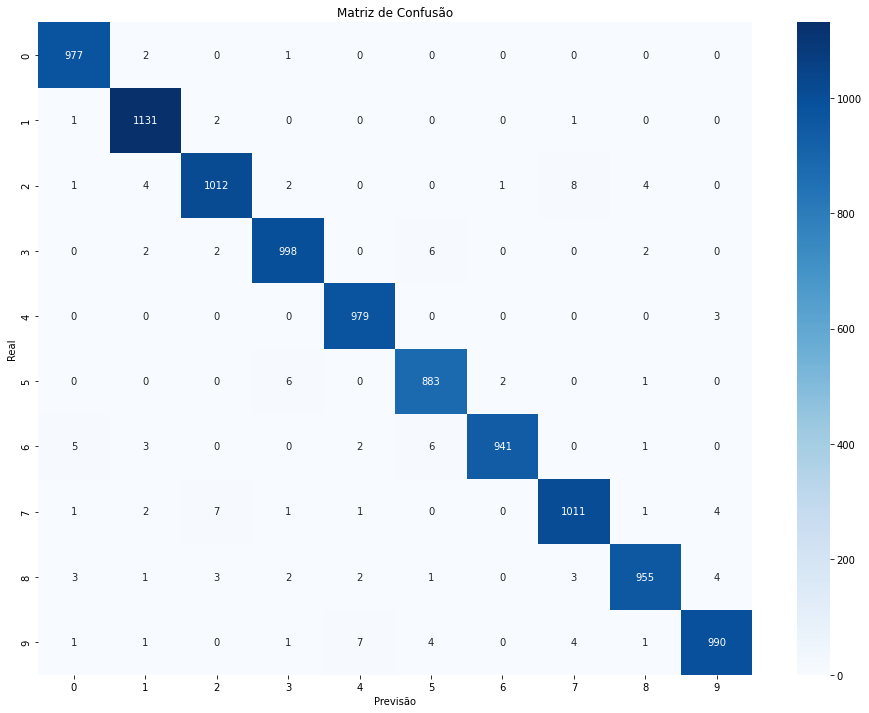

In [ ]:
# Previsões do modelo para o conjunto de testes
y_pred = model.predict(X_test)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, np.argmax(y_pred, axis=1))

# Plotando a matriz de confusão com heatmap do seaborn
plt.figure(figsize=(16,12))
sns.heatmap(conf_matrix, cmap="Blues", annot=True, fmt="d", cbar=True, xticklabels=[str(i) for i in range(10)], yticklabels=[str(i) for i in range(10)])
plt.title("Matriz de Confusão")
plt.xlabel("Previsão")
plt.ylabel("Real")
plt.show()

##4.2 Curva ROC

A curva ROC (Receiver Operating Characteristic) é uma representação gráfica do desempenho de um modelo de classificação binária. A curva é criada traçando a taxa de verdadeiros positivos (TPR) em relação à taxa de falsos positivos (FPR) em vários pontos de corte para o valor de probabilidade de uma classe positiva.

A TPR é a proporção de amostras positivas que são classificadas corretamente pelo modelo em relação ao total de amostras positivas, enquanto a FPR é a proporção de amostras negativas que são classificadas incorretamente como positivas pelo modelo em relação ao total de amostras negativas. A curva ROC é criada traçando a TPR no eixo y versus a FPR no eixo x.

Quanto mais próxima a curva ROC estiver do canto superior esquerdo do gráfico, melhor será o desempenho do modelo. Isso ocorre porque a taxa de verdadeiros positivos é alta e a taxa de falsos positivos é baixa. Por outro lado, se a curva ROC estiver próxima da linha diagonal do gráfico, o modelo não é melhor do que um modelo aleatório, pois sua taxa de falsos positivos e verdadeiros positivos é semelhante.

Além da curva ROC, a área sob a curva ROC (AUC-ROC) também é uma métrica comumente usada para avaliar o desempenho de um modelo de classificação binária. A AUC-ROC é uma medida da capacidade do modelo de distinguir entre classes positivas e negativas. A AUC-ROC varia entre 0 e 1, sendo que um valor de 1 indica um modelo perfeito e um valor de 0,5 indica que o modelo é tão bom quanto uma escolha aleatória.

313/313 [==============================] - 1s 2ms/step


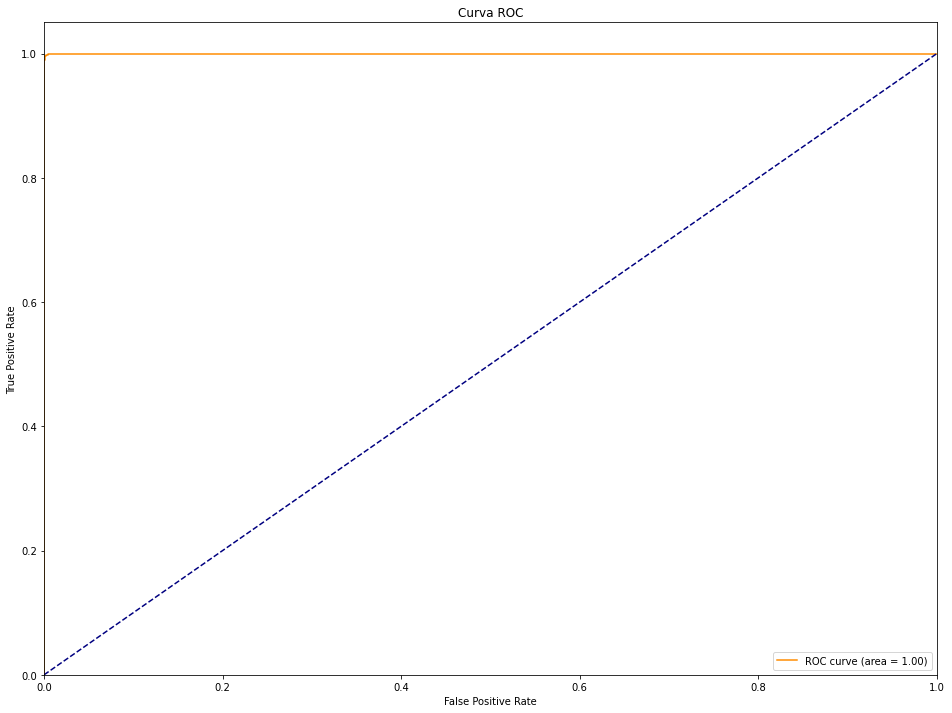

In [ ]:
# Previsões do modelo para o conjunto de testes
y_pred = model.predict(X_test)

# Calculando a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred[:,1], pos_label=1)
roc_auc = auc(fpr, tpr)

# Plotando a curva ROC
plt.figure(figsize=(16,12))
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

#5.Testando e Visualizando 

In [ ]:
#obtem imagem numero 365
x = X_test[365]
print(x.shape)
x = np.expand_dims(x, axis=0)
print(x.shape)

# imprime a avaliação da amostra
print(model.predict(x))
print(np.argmax(model.predict(x)))

(28, 28)
(1, 28, 28)
1/1 [==============================] - 0s 19ms/step
[[1.0000000e+00 6.1827531e-12 1.1868361e-12 6.4855044e-19 2.5224578e-19
  7.4355054e-17 6.8026179e-10 1.3753792e-15 6.5286353e-11 6.0098935e-12]]
1/1 [==============================] - 0s 21ms/step
0


(10000, 28, 28)


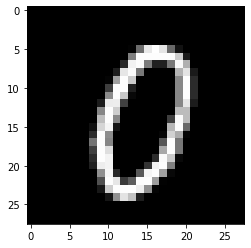

0


In [84]:
print(X_test.shape) # imprime o tamanho do vetor, (10000, 28, 28)

image = X_test[365] # obtém a imagem do conjunto de teste no índice 365 do vetor
plt.imshow(image, cmap='gray') #exibe a imagem do vetor
plt.show()

print(y_test[365]) #imprime a classe da imagem de teste do indice 365